Train Data Head:
   Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsuranc

/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_5733/2772374706.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.fillna('unknown', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.72375

Confusion Matrix:
 [[419  65]
 [156 160]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       484
           1       0.71      0.51      0.59       316

    accuracy                           0.72       800
   macro avg       0.72      0.69      0.69       800
weighted avg       0.72      0.72      0.71       800



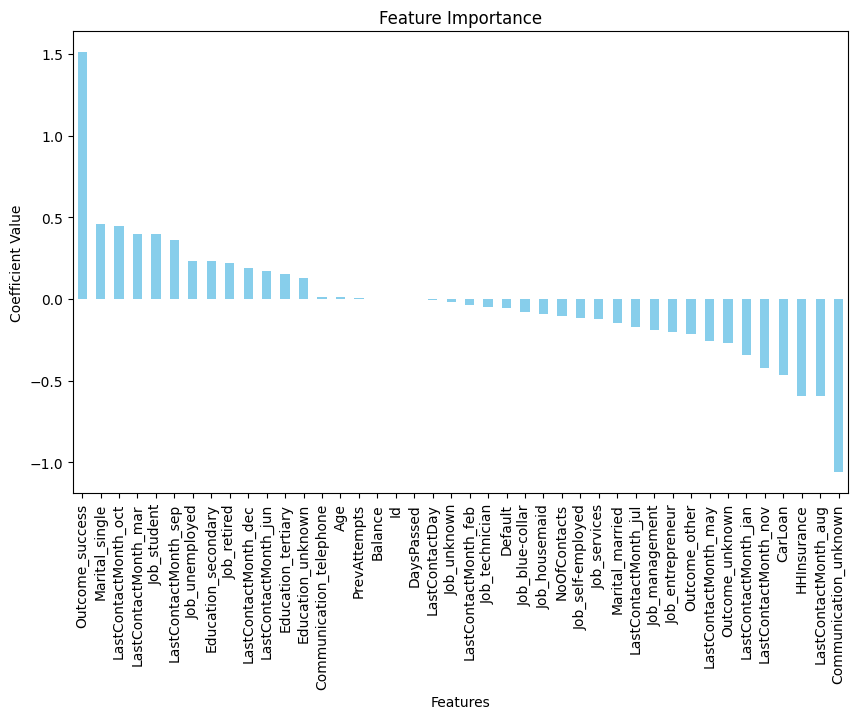

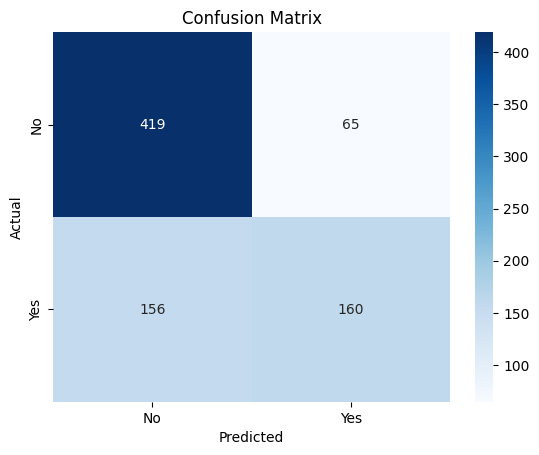

Predictions saved to 'test_predictions.csv'.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Train and Test data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Display the first few rows
print("Train Data Head:")
print(train.head())
print("\nTest Data Head:")
print(test.head())

# Check for missing values
print("\nMissing Values in Train Data:")
print(train.isnull().sum())
print("\nMissing Values in Test Data:")
print(test.isnull().sum())

# Fill missing values with 'unknown'
train.fillna('unknown', inplace=True)
test.fillna('unknown', inplace=True)

# Drop unnecessary columns
train.drop(['CallStart', 'CallEnd'], axis=1, inplace=True)
test.drop(['CallStart', 'CallEnd'], axis=1, inplace=True)

# One-hot encode categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

# Align train and test datasets
train_encoded, test_encoded = train_encoded.align(test_encoded, join='inner', axis=1)

# Ensure target column is preserved after alignment
train_encoded['CarInsurance'] = train['CarInsurance']

# Separate features and target
X = train_encoded.drop('CarInsurance', axis=1)
y = train_encoded['CarInsurance']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluate model
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Predict on test data
test_predictions = model.predict(test_encoded)

# Save predictions
test['CarInsurance'] = test_predictions

# Save the output to a file
test[['Id', 'CarInsurance']].to_csv('test_predictions.csv', index=False)

# Feature importance visualization
importance = pd.Series(model.coef_[0], index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

# Confusion matrix heatmap visualization
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Predictions saved to 'test_predictions.csv'.")


# Iris

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (Assuming it's a CSV file)
# If using the Iris dataset from sklearn:
from sklearn.datasets import load_iris

# Load Iris dataset
data = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Display the first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Check for missing values
df.isnull().sum()

# Split into features and target
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (especially for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


KNN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



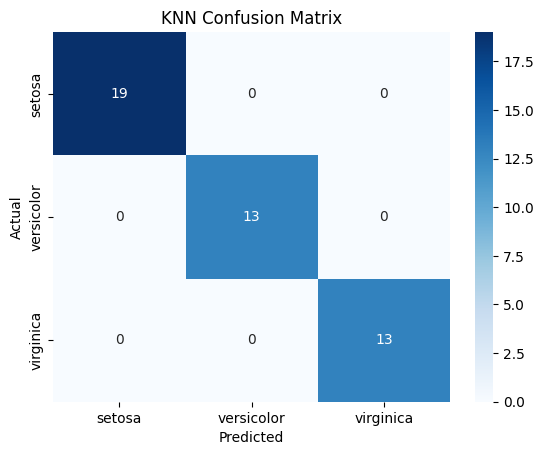

In [18]:
# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation of KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("KNN Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



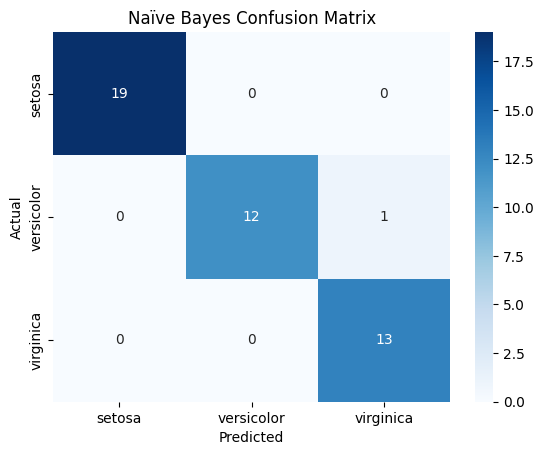

In [19]:
# Train Naïve Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test_scaled)

# Evaluation of Naïve Bayes
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Naïve Bayes Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


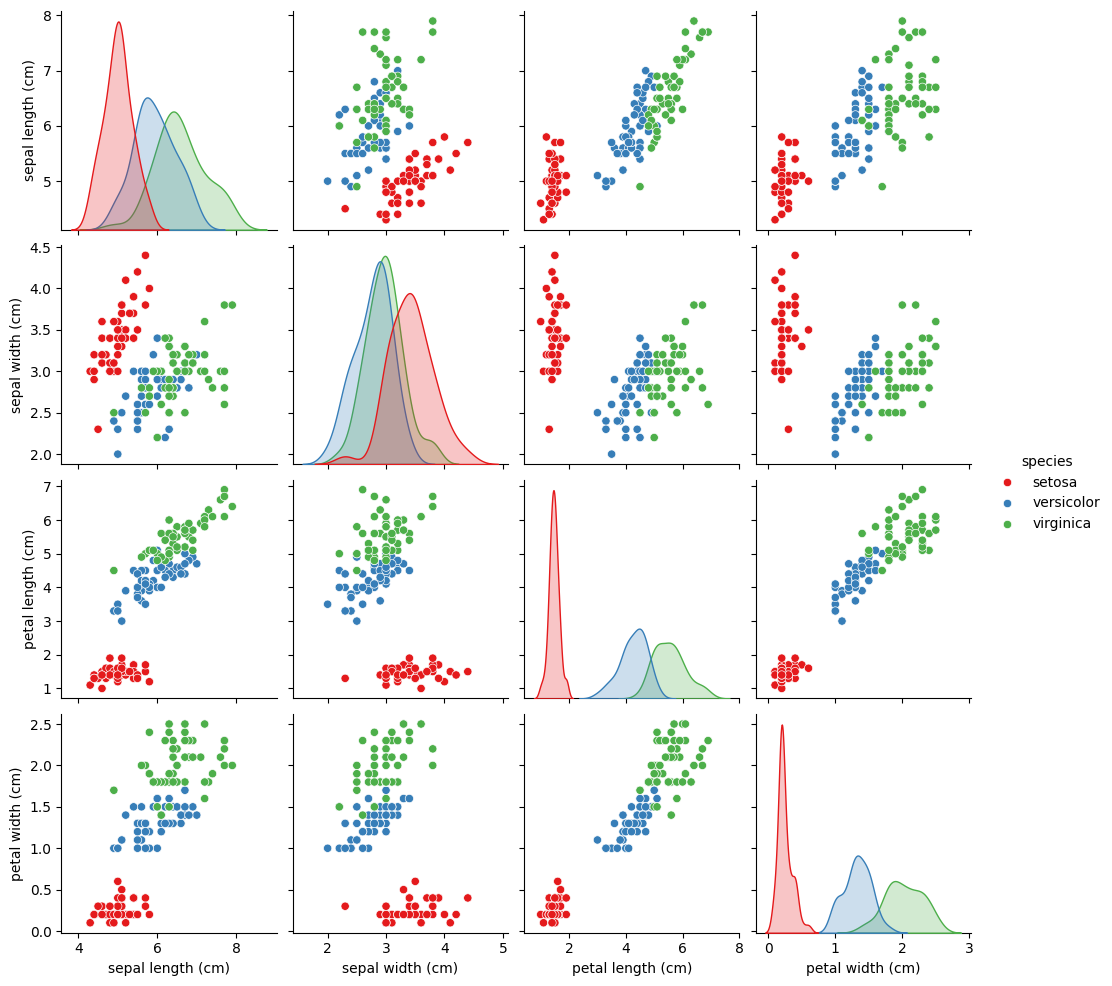

In [20]:
# Pairplot of features to see data distribution
sns.pairplot(df, hue="species", palette="Set1")
plt.show()


In [21]:
# Accuracy of both models
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy of KNN: {accuracy_knn:.2f}")
print(f"Accuracy of Naïve Bayes: {accuracy_nb:.2f}")


Accuracy of KNN: 1.00
Accuracy of Naïve Bayes: 0.98


In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# Load the dataset (Assuming you have a CSV file)
df = pd.read_csv("employee.csv")

# Sample data to demonstrate the process (replace with actual data)


# Convert 'Attrition' to binary (Yes=1, No=0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Label encode categorical variables
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Split data into features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


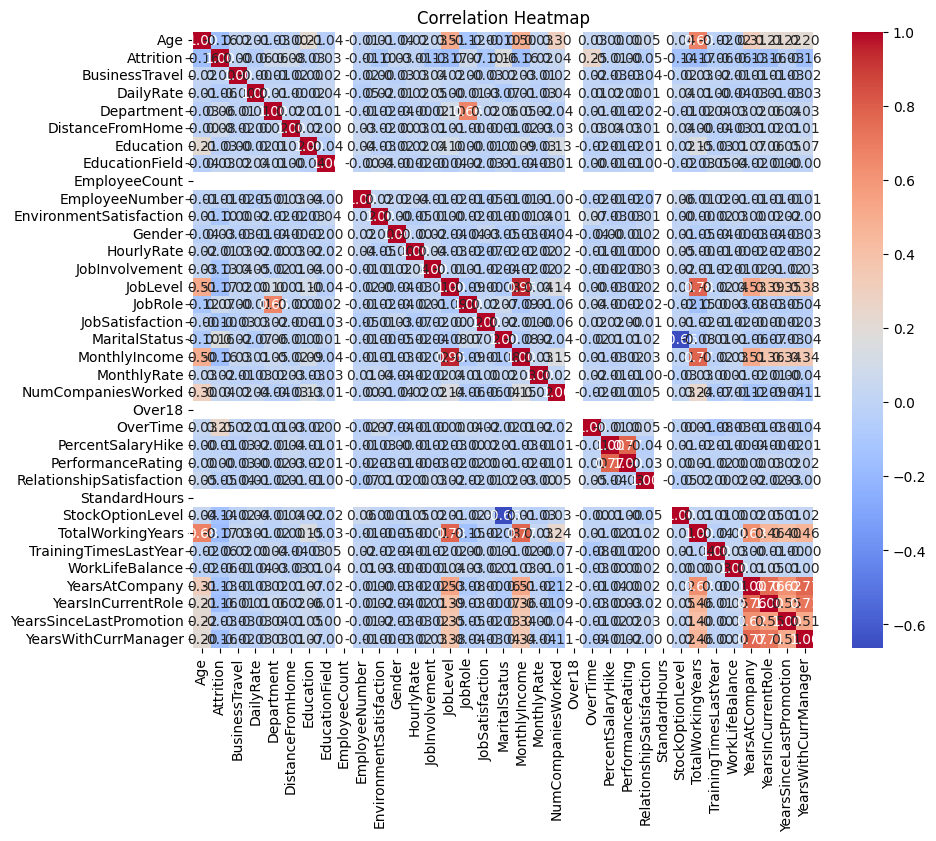

/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_5733/4028837603.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='coolwarm')


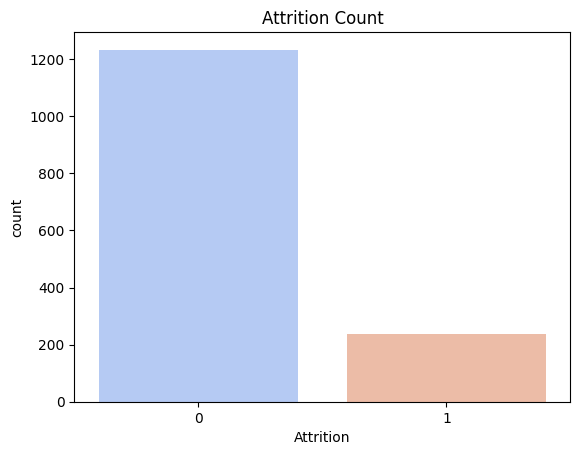

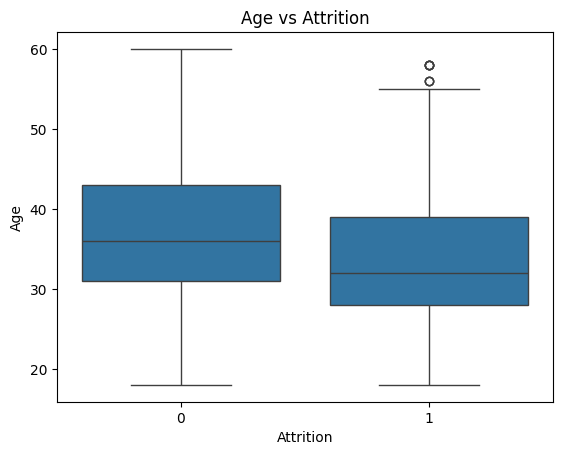

In [24]:
# Visualize correlations with heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Visualize the distribution of features related to attrition
sns.countplot(x='Attrition', data=df, palette='coolwarm')
plt.title("Attrition Count")
plt.show()

# Boxplot to show relationship of 'Age' with 'Attrition'
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       380
           1       0.28      0.31      0.29        61

    accuracy                           0.79       441
   macro avg       0.58      0.59      0.58       441
weighted avg       0.80      0.79      0.80       441



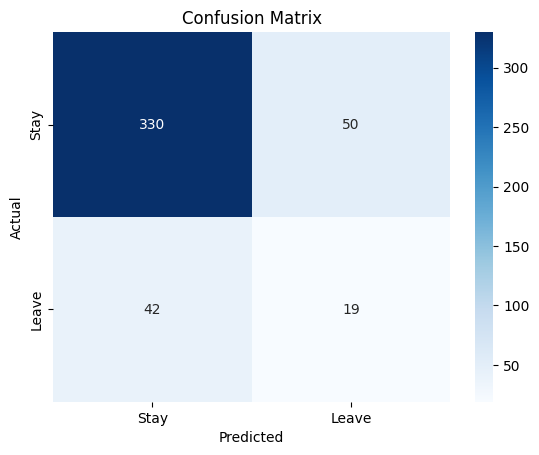

In [25]:
# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


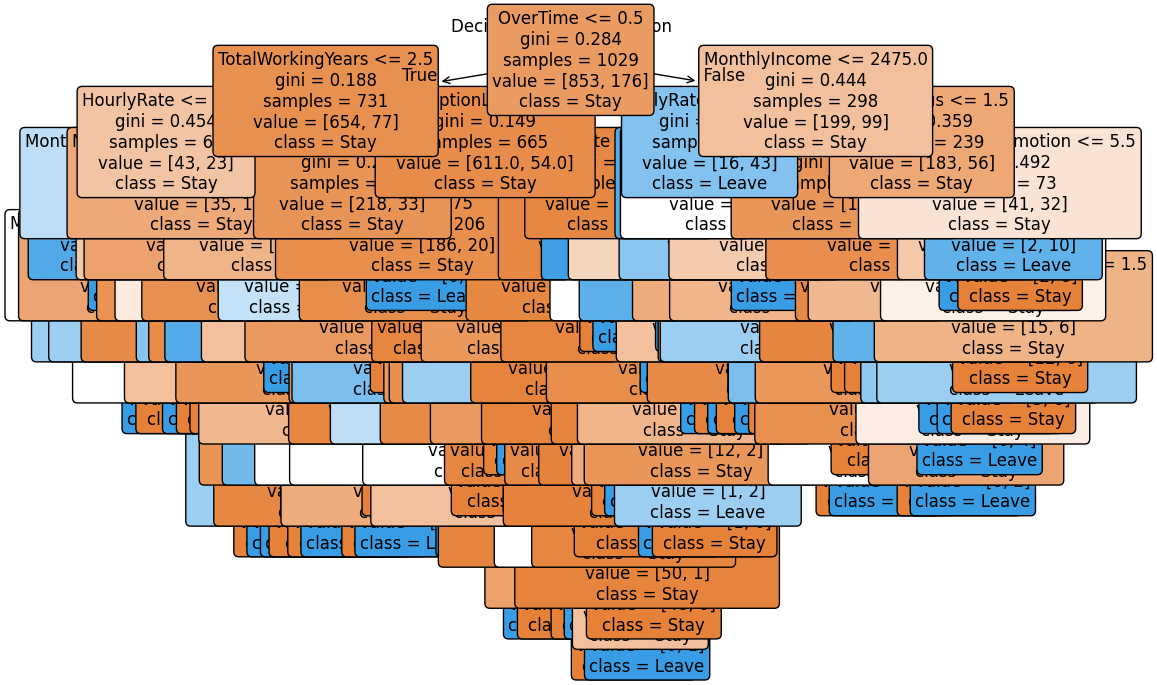

In [26]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Stay', 'Leave'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()


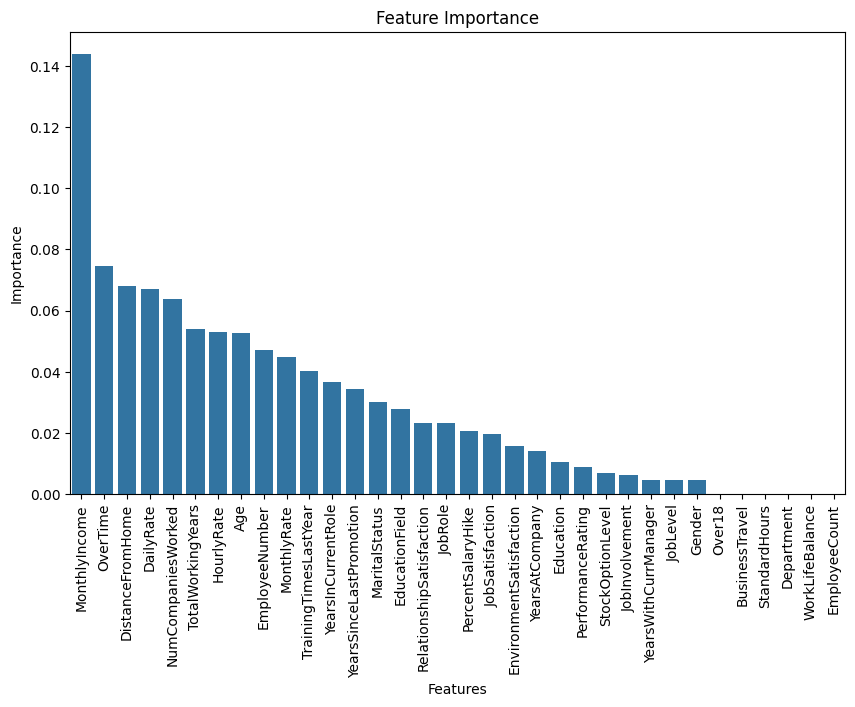

In [27]:
# Visualize Feature Importance
feature_importance = pd.DataFrame(dt.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()
